In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats import norm, skew
import pickle as pkl

In [2]:
data = pd.DataFrame()

file = [x for x in os.listdir('./Data')]

for i in file:
    if len(data) == 0:
        data = pd.read_csv('./Data/'+i)
    else:
        data = pd.concat([data, pd.read_csv('./Data/'+i)], 0)

In [3]:
data.shape

(6810, 6)

In [4]:
data.head()

,model,year,mileage,image,color,cost
0,2019 Audi A5 Sportback,2019,"36,070 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Ibis White,"$29,900"
1,2019 Audi A5 Sportback,2019,"21,221 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Black,"$33,900"
2,2019 Audi RS 3,2019,105 miles,https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Black,"$54,900"
3,2018 Audi Q3,2018,"49,580 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Brilliant Black,"$23,900"
4,2018 Audi Q5,2018,"48,075 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Blue,"$32,700"


### FEATURE ENGINEERING

In [5]:
df = data.copy()

1. Target Variable:

Since cost is the target variable, if the cost is given as a nan value then lets drop it

In [6]:
df = df[pd.notnull(df['cost'])]

In [7]:
df['cost'] = df['cost'].apply(lambda x: (x.replace('$', '')).replace(',', ''))

In [8]:
def cost_transform(x):
    try:
        return float(x)
    except:
        return x

In [9]:
df['cost'] = df['cost'].apply(lambda x: cost_transform(x))

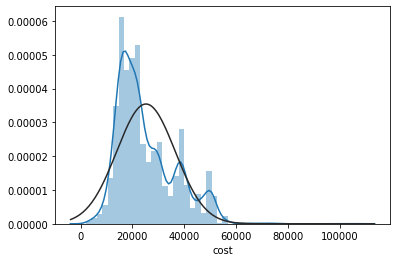

In [10]:
sns.distplot(df['cost'], fit = norm)

In [11]:
skew(df['cost'])

1.001370553611522

In [12]:
skew(np.log(df['cost']))

-0.08622790968556064

The skew reduces drastically when we log the prices!

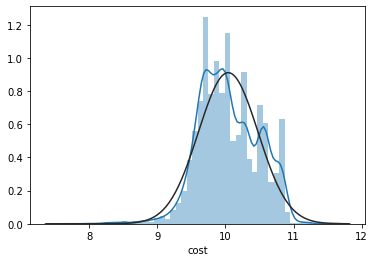

In [13]:
sns.distplot(np.log(df['cost']), fit= norm)

In [14]:
df['log_cost'] = np.log(df['cost'])

In [15]:
df.drop('cost', 1, inplace = True)

2. Column: Model

In [16]:
df['model'].unique()[:10]

array(['2019 Audi A5 Sportback', '2019 Audi RS 3', '2018 Audi Q3',
       '2018 Audi Q5', '2018 Audi A8 L', '2018 Audi SQ5',
       '2018 Audi S5 Sportback', '2017 Audi A6', '2017 Audi Q7',
       '2015 Audi Q5'], dtype=object)

Lets drop the year part of the model and the company of the car from the name

In [17]:
model_per_company = {} # Keys are comapnies and values are the models prodced by company

In [18]:
for i in df['model'].to_list():
    
    model_name_ = ''
    for part in i.split(' ')[2:]:
        model_name_ += part + ' '
    model_name_ = model_name_.rstrip()
    
    if i.split(' ')[1] not in model_per_company.keys():
        model_per_company[i.split(' ')[1]] = []
        
    if model_name_ not in model_per_company[i.split(' ')[1]]:
        model_per_company[i.split(' ')[1]].append(model_name_)
        

In [19]:
model_per_company

{'Audi': ['A5 Sportback',
  'RS 3',
  'Q3',
  'Q5',
  'A8 L',
  'SQ5',
  'S5 Sportback',
  'A6',
  'Q7',
  'A3',
  'A4',
  'A5',
  'TT',
  'A8',
  'A7',
  'TTS',
  'S5',
  'RS 5',
  'S6',
  'A3 Sportback e-tron'],
 'Chevrolet': ['Malibu',
  'Equinox',
  'Trax',
  'Impala',
  'Silverado 1500',
  'Camaro',
  'Corvette',
  'Express Passenger',
  'Blazer',
  'Express Cargo Van',
  'Traverse',
  'Silverado 2500HD',
  'Suburban',
  'Cruze',
  'Colorado',
  'SS',
  'impala limited',
  'Cobalt',
  'Trailblazer',
  'ASTRO PASSENGER',
  'Cruze Limited',
  'C/K 1500',
  'Express Cargo',
  'Tahoe'],
 'Chrysler': ['Pacifica',
  '300',
  '200',
  'Town & Country',
  '300C',
  'Pacifica Hybrid'],
 'Dodge': ['Charger',
  'Durango',
  'Grand Caravan',
  'Journey',
  'Challenger',
  'Dart',
  'Caliber',
  'Caravan',
  'Avenger',
  'Ram 1500',
  'Neon',
  'Dakota',
  'Grand Caravan Passenger'],
 'Ford': ['Transit Passenger Wagon',
  'Mustang',
  'F-150',
  'Fusion Hybrid',
  'Transit Connect Van',
  'Fus

In [20]:
with open('./PklFiles/model_transform.pkl', 'wb') as f:
    pkl.dump(model_per_company, f)

In [21]:
def model_transform(x):
    final = ''
    for i in x.split(' ')[2:]:
        final += i
    return final

In [22]:
df['company'] = df['model'].apply(lambda x: x.split(' ')[1])

In [23]:
df['model'] = df['model'].apply(lambda x: model_transform(x))

In [24]:
df.head()

,model,year,mileage,image,color,log_cost,company
0,A5Sportback,2019,"36,070 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Ibis White,10.305614,Audi
1,A5Sportback,2019,"21,221 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Black,10.431170,Audi
2,RS3,2019,105 miles,https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Black,10.913269,Audi
3,Q3,2018,"49,580 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Brilliant Black,10.081634,Audi
4,Q5,2018,"48,075 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Blue,10.395130,Audi


In [25]:
df['model'].nunique()

203

In [26]:
data['model'].nunique()

771

We have reduced the cardinality of the model column by more than 500!

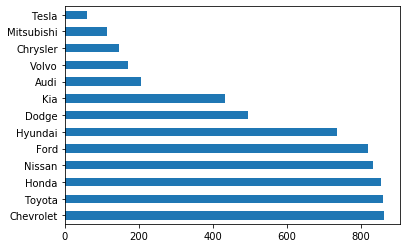

In [27]:
df['company'].value_counts().plot(kind = 'barh')

3. Mileage

In [28]:
df.head()

,model,year,mileage,image,color,log_cost,company
0,A5Sportback,2019,"36,070 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Ibis White,10.305614,Audi
1,A5Sportback,2019,"21,221 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Black,10.431170,Audi
2,RS3,2019,105 miles,https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Black,10.913269,Audi
3,Q3,2018,"49,580 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Brilliant Black,10.081634,Audi
4,Q5,2018,"48,075 miles",https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Blue,10.395130,Audi


In [29]:
df['mileage'].fillna('-99,999 miles', inplace = True)

In [30]:
df['mileage'] = df['mileage'].apply(lambda x: float((x.split(' ')[0]).replace(',', '')))

In [31]:
df['mileage'] = df['mileage'].replace(-99999, np.nan)

In [32]:
df.groupby('year')['mileage'].mean()

year
1994    150000.000000
1997    123915.000000
1998              NaN
2000     92822.000000
2001    164694.000000
2002     98359.333333
2003    139603.000000
2004    159782.333333
2005    129107.285714
2006    133225.545455
2007    107690.800000
2008    137695.142857
2009    107229.812500
2010    105994.250000
2011    104669.000000
2012     86946.333333
2013     78334.193878
2014     70242.533333
2015     66559.919540
2016     47995.974937
2017     33153.040447
2018     31142.990646
2019     23950.744021
2020     16064.624155
2021       439.000000
Name: mileage, dtype: float64

In [33]:
df[df['year'] == 1998]

,model,year,mileage,image,color,log_cost,company
46,Durango,1998,NaN,https://cdcssl.ibsrv.net/ibimg/www.carsdirect....,Gray,11.127086,Dodge


Lets drop this one record

In [34]:
df = df[df['year'] != 1998]

In [35]:
df['mileage'] = df.groupby('year')['mileage'].transform(lambda x: x.fillna(x.mean()))

In [36]:
df.isnull().sum()

model         0
year          0
mileage       0
image         0
color       471
log_cost      0
company       0
dtype: int64

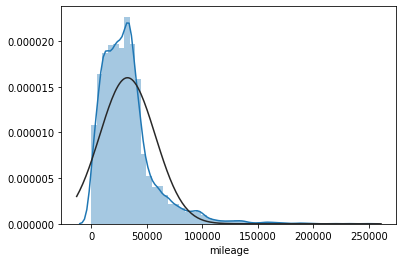

In [37]:
sns.distplot(df['mileage'], fit= norm)

In [38]:
skew(df['mileage'])

2.1169389349674566

Lets apply cube root transformation to this column to make it more Gaussian

In [39]:
skew(df['mileage']**(1/3))

-0.18769947901754705

In [40]:
df['mileage'] = df['mileage']**(1/3)

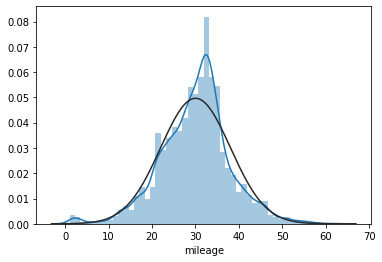

In [41]:
sns.distplot(df['mileage'], fit = norm)

4. Color

Lets replace all nan values with 'Not Given'

In [42]:
df['color'].fillna('Not Given', inplace = True)

In [43]:
df['color'].nunique()

216

In [44]:
basic_colors = ['White', 'Black', 'Grey', 'Metallic', 'Red', 'Blue', 'Brown', 'Green']

In [45]:
def color_transform(x):
    
    not_found = 0
    for i in basic_colors:
        if i in x:
            not_found = 1
            return i
    if not_found == 0:
        return x

In [46]:
df['color'] = df['color'].apply(lambda x: color_transform(x))

In [47]:
df['color'].nunique()

69

Since there are only 2 instances of grey lets club it with metallic 

In [48]:
df['color'] = df['color'].replace('Grey', 'Metallic')

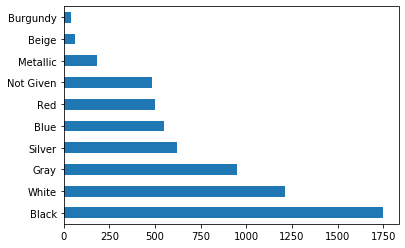

In [49]:
df['color'].value_counts().sort_values(ascending = False)[:10].plot(kind = 'barh')

In [50]:
color_dict = dict(df['color'].value_counts().sort_values(ascending = False)[:14])

In [51]:
def color_other(x):
    if x not in color_dict.keys():
        return 'Other'
    else:
        return x

In [52]:
df['color'] = df['color'].apply(lambda x: color_other(x))

In [53]:
df['color'].unique()

array(['White', 'Black', 'Blue', 'Gray', 'Not Given', 'Metallic', 'Other',
       'Silver', 'Red', 'Beige', 'Burgundy', 'Orange', 'Green', 'Brown',
       'Brilliant Silver'], dtype=object)

In [54]:
df['color'] = df['color'].replace('Not Given', 'N/A')

Lets drop the image column since we do not need it to make predictions

In [55]:
df.drop('image', axis = 1, inplace = True)

In [56]:
df.head()

,model,year,mileage,color,log_cost,company
0,A5Sportback,2019,33.040660,White,10.305614,Audi
1,A5Sportback,2019,27.685686,Black,10.431170,Audi
2,RS3,2019,4.717694,Black,10.913269,Audi
3,Q3,2018,36.736872,Black,10.081634,Audi
4,Q5,2018,36.361330,Blue,10.395130,Audi


5. Year

Lets drop the year column and replace it with the duration from current year

In [57]:
import datetime
current_year = datetime.datetime.now().year

In [58]:
df['year'] = current_year - df['year']

### Label Encoding

In [59]:
company_transformer = {}

unique_comps = list(df['company'].unique())

for i in unique_comps:
    com_unique = list(df['company'].unique())
    for y in com_unique:
        if y != i:
            ind = com_unique.index(y)
            com_unique[ind] = 0
    main_ind = com_unique.index(i)
    com_unique[main_ind] = 1
    company_transformer[i] = com_unique

In [60]:
df = pd.concat([df.drop('company', 1), pd.get_dummies(df['company'], drop_first = False)], axis = 1)

In [61]:
with open('PklFiles/companies.pkl', 'wb') as f:
    pkl.dump(company_transformer, f)

In [62]:
color_transformer = {}

unique_color = list(df['color'].unique())

for i in unique_color:
    color_unique = list(df['color'].unique())
    for y in color_unique:
        if y != i:
            ind = color_unique.index(y)
            color_unique[ind] = 0
    main_ind = color_unique.index(i)
    color_unique[main_ind] = 1
    color_transformer[i] = color_unique

In [63]:
with open('PklFiles/color_transform.pkl', 'wb') as f:
    pkl.dump(color_transformer, f)

In [64]:
df = pd.concat([df.drop('color', 1), pd.get_dummies(df['color'], drop_first = False)], axis = 1)

In [65]:
df_models = list(df['model'].unique())

def transform_models(x):
    return df_models.index(x)

df['model'] = df['model'].apply(lambda x: transform_models(x))

In [66]:
df.head()

,model,year,mileage,log_cost,Audi,Chevrolet,Chrysler,Dodge,Ford,Honda,...,Burgundy,Gray,Green,Metallic,N/A,Orange,Other,Red,Silver,White
0,0,1,33.040660,10.305614,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,27.685686,10.431170,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,4.717694,10.913269,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,36.736872,10.081634,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,2,36.361330,10.395130,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
with open('./PklFiles/model_names.pkl', 'wb') as f:
    pkl.dump(df_models, f)

### MODEL BUILDING

In [68]:
df = df.sample(frac=1).reset_index(drop=True) #shuffling the dataframe

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('log_cost', 1), df['log_cost'],
                                                    random_state = 42, test_size = 0.2)

In [70]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso, ElasticNet, BayesianRidge, Ridge, LassoLarsIC
from sklearn.preprocessing import RobustScaler
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import RandomizedSearchCV as RCV

### Random Forest Regressor

In [71]:
params = {'n_estimators': np.arange(100,500, 100),
          'max_depth': [2,3,5,7],
          'max_features': [0.5, 1]}

model_rf = RCV(RandomForestRegressor(oob_score = True), params).fit(X_train, y_train)

In [72]:
model_rf = model_rf.best_estimator_

In [73]:
print(np.sqrt(mse(y_test, model_rf.predict(X_test))))
model_rf.score(X_test, y_test)

0.20081452578673406


0.7841024051099488

<b>Gradient Boosting Trees</b>

In [74]:
params = {'n_estimators': np.arange(100,500, 100),
          'learning_rate': np.arange(0.01, 0.31, 0.05),
          'max_features': [0.5, 1],
          'max_depth': [3,5,7],
          'alpha': [0.5, 0.9, 1]}

In [75]:
model_gb = RCV(GradientBoostingRegressor(), params).fit(X_train, y_train)

model_gb = model_gb.best_estimator_

In [76]:
np.sqrt(mse(y_test, model_gb.predict(X_test)))

0.15860843660107365

In [77]:
model_gb.score(X_test, y_test)

0.8653178238672813

<b>XGBRegressor</b>

In [78]:
params = {'n_estimators': np.arange(100,500, 100),
          'learning_rate': np.arange(0.01, 0.31, 0.05),
          'max_depth': [3,5,7],
          'gamma': [0, 0.5, 1]}

model_xg = RCV(XGBRegressor(), params).fit(X_train, y_train)

[13:59:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:59:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [79]:
model_xg

RandomizedSearchCV(estimator=XGBRegressor(),
                   param_distributions={'gamma': [0, 0.5, 1],
                                        'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26]),
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': array([100, 200, 300, 400])})

In [80]:
np.sqrt(mse(y_test, model_xg.predict(X_test)))

0.15967389245789293

In [81]:
model_xg.score(X_test, y_test)

0.8635022850253604

<b>Lasso Regression</b>

In [82]:
model_lr = make_pipeline(RobustScaler(),
                         Lasso(alpha = 0.0001) ).fit(X_train, y_train)

In [83]:
np.sqrt(mse(y_test, model_lr.predict(X_test)))

0.2519164341212291

In [84]:
model_lr.score(X_test, y_test)

0.6602413231085675

<b>ElasticNet</b>

In [85]:
model_en = ElasticNet(alpha = 0.001, l1_ratio = 0.5).fit(X_train, y_train)

In [86]:
np.sqrt(mse(y_test, model_en.predict(X_test)))

0.2531418545229483

In [87]:
model_en.score(X_test, y_test)

0.6569278445425184

<b>Kernel Ridge</b>

In [88]:
model_kr = KernelRidge(alpha = 0.1).fit(X_train, y_train)

In [89]:
np.sqrt(mse(y_test, model_kr.predict(X_test)))

0.25230816011912327

In [90]:
model_kr.score(X_test, y_test)

0.6591838630392403

<b>Bayesian Ridge</b>

In [91]:
model_br = BayesianRidge(n_iter = 500).fit(X_train, y_train)

In [92]:
np.sqrt(mse(y_test, model_br.predict(X_test)))

0.25163975795745475

In [93]:
model_br.score(X_test, y_test)

0.6609872173295922

<b>LassoLarsIC</b>

In [94]:
model_llc = make_pipeline(RobustScaler(),
                          LassoLarsIC() ).fit(X_train, y_train)

In [95]:
np.sqrt(mse(y_test, model_llc.predict(X_test)))

0.25144686790353077

In [96]:
model_llc.score(X_test, y_test)

0.6615067467699294

Linear models are not performing well in this case, thus lets create an ensemble of a few of the models and see if we can imporve performance

<b>STACKING REGRESSOR</b>

In [99]:
models_2 = [('gb', model_gb), 
            ('en', model_en), 
            ('xgb', model_xg)]

In [100]:
model_stack_2 = StackingRegressor(models_2, Lasso(alpha = 0.001)).fit(X_train, y_train)

[14:04:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:04:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:05:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[14:06:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:07:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[14:09:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:09:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[14:10:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

[14:11:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:11:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is n

In [101]:
np.sqrt(mse(y_test, model_stack_2.predict(X_test)))

0.15183639053996273

In [102]:
model_stack_2.score(X_test, y_test)

0.8765732485803163

### Stack 2 gives us the best performance. 
Models used for ensemble:
 * Gradient Boosting Trees
 * Elastic Net
 * XGBoost Regressor

### NOTE : Transformations applied:
 * cost has been logged
 * year has been changed to distance from current year
 * year and company has been dropped from model name and the resultants have been replaced by label encoding
 * Company and Colors have been one hot encoded
 * cube root of mileage has been taken

### Steps To Get the DataSet Ready For this Model:

 * Company names are keys of 'PklFiles/companies.pkl'
 * Color names are keys of 'PklFiles/color_transform.pkl'
 * Models of that company are stored in './PklFiles/model_transform.pkl'
 * Take Cube root of the entered mileage
 * Subtract 2020 from year of purchase
 * X data should be of the form : model_encoded, year, mileage, encoding of company, encoding of color
 * Predictor (Regressor) is stored in './PklFiles/predictor.pkl'
 * Raise your prediction to e before displaying result